In [1]:
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

In [2]:
width = 128
num_classes = 8
trainpath = './ImagesDataset/Train/'
testpath = './ImagesDataset/Test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
# print(trainpath)
# print(testpath)
print(trainImg)
print(testImg)

['./ImagesDataset/Train/BlackDot', './ImagesDataset/Train/BlackWhip', './ImagesDataset/Train/LeafBurn', './ImagesDataset/Train/RedLine', './ImagesDataset/Train/RingLeaf', './ImagesDataset/Train/RustMold', './ImagesDataset/Train/StreakMosaic', './ImagesDataset/Train/YellowLeaf']
['./ImagesDataset/Test/BlackDot', './ImagesDataset/Test/BlackWhip', './ImagesDataset/Test/LeafBurn', './ImagesDataset/Test/RedLine', './ImagesDataset/Test/RingLeaf', './ImagesDataset/Test/RustMold', './ImagesDataset/Test/StreakMosaic', './ImagesDataset/Test/YellowLeaf']


In [105]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            l = imagePath.split('/')[3] # การเข้าถึง ท่อนแบ่งด้วย /
            if l == 'BlackDot': #ใบจุดดำ
              labels.append([1,0,0,0,0,0,0,0])         
            elif l == 'BlackWhip':#แส้ดำ
              labels.append([0,1,0,0,0,0,0,0])
            elif l == 'LeafBurn':#ใบไหม้
              labels.append([0,0,1,0,0,0,0,0])
            elif l == 'RedLine':#เส้นกลางใบแดง
              labels.append([0,0,0,1,0,0,0,0])
            elif l == 'RingLeaf':#ใบจุดวงแหวน
              labels.append([0,0,0,0,1,0,0,0])
            elif l == 'RustMold':#ราสนิม
              labels.append([0,0,0,0,0,1,0,0])
            elif l == 'StreakMosaic':#ใบด่าง
              labels.append([0,0,0,0,0,0,1,0])
            elif l == 'YellowLeaf':
              labels.append([0,0,0,0,0,0,0,1])#ใบเหลือง
  return rawImgs, labels 

x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 100/100 [00:17<00:00,  5.85it/s]


In [107]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.00
x_test /= 255.00

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 128, 128, 3)
(3200, 8)
(800, 128, 128, 3)
(800, 8)


MobilenetV2

Epoch 1/10
100/100 [==============================] - 31s 260ms/step - loss: 1.0740 - accuracy: 0.9000 - val_loss: 0.1576 - val_accuracy: 0.9513
Epoch 2/10
100/100 [==============================] - 25s 254ms/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.2165 - val_accuracy: 0.9212
Epoch 3/10
100/100 [==============================] - 25s 248ms/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.2045 - val_accuracy: 0.9337
Epoch 4/10
100/100 [==============================] - 25s 254ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1841 - val_accuracy: 0.9388
Epoch 5/10
100/100 [==============================] - 25s 254ms/step - loss: 7.1289e-04 - accuracy: 1.0000 - val_loss: 0.2016 - val_accuracy: 0.9312
Epoch 6/10
100/100 [==============================] - 25s 248ms/step - loss: 5.2324e-04 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9362
Epoch 7/10
100/100 [==============================] - 26s 263ms/step - loss: 4.0909e-04 - accuracy: 1.0000 - val_loss: 0.1

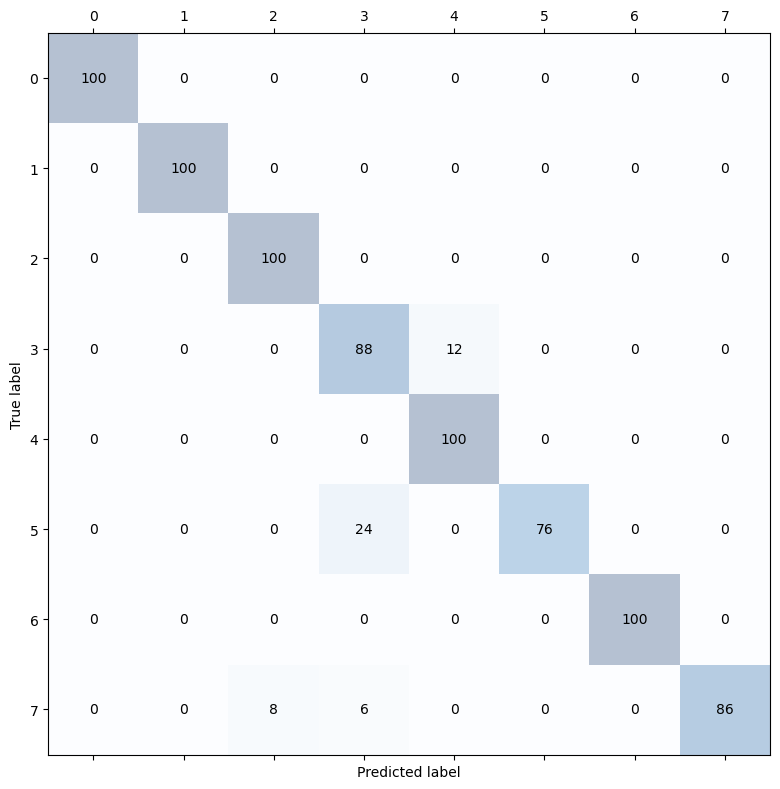

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       0.93      1.00      0.96       100
           3       0.75      0.88      0.81       100
           4       0.89      1.00      0.94       100
           5       1.00      0.76      0.86       100
           6       1.00      1.00      1.00       100
           7       1.00      0.86      0.92       100

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



In [108]:
# โหลด MobilenetV2 model มาจาก tensorflow hub
mobilenetModel = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top=False, weights='imagenet')
mobilenetModel.trainable = False

# สร้าง model ใหม่ โดยเพิ่ม layer ต่อจาก model ที่โหลดมา
mobilenetModelModify = Sequential()
mobilenetModelModify.add(mobilenetModel)
mobilenetModelModify.add(Conv2D(128, 3, activation='relu'))
mobilenetModelModify.add(MaxPool2D(2))
mobilenetModelModify.add(Dense(16))
mobilenetModelModify.add(Flatten())
mobilenetModelModify.add(Dense(8, activation='softmax'))

# กำหนดตัวแปรในการ train model
mobilenetModelModify.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy'])
mobilenetModelModify.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
mobilenetPred = mobilenetModelModify.predict(x_test)
mobilenetPred = np.argmax(mobilenetPred ,axis=1)
# print(len(y_pred))
# print(y_pred)

# ฟังก์ชันแปลง array 2d เป็น array 1d เพื่อแปลงค่า label ให้เป็นตัวเลข 0-7
def convert_to_1d_array(array_2d):
    array_1d = []
    for i in range(len(array_2d)):
        array_1d.append(array_2d[i])
    return array_1d

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
mobilenetPredictLabels = convert_to_1d_array(mobilenetPred)
# print(resaultPredictLabels)

# สร้าง array ขนาด 800 ตัวเลข 0 เพื่อเก็บค่า label จริง
true_labels = np.zeros(800, dtype=int)
for i in range(8):
    true_labels[i*100:(i+1)*100] = i
# Print the array
# print(len(true_labels))


# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
confusion_matrix = confusion_matrix(true_labels, mobilenetPredictLabels)
# Accuracy_score
accuracy_score = accuracy_score(true_labels, mobilenetPredictLabels)
# Recall_score
recall_score = recall_score(true_labels, mobilenetPredictLabels, average='macro')
# resaultPredict
f1_score = f1_score(true_labels, mobilenetPredictLabels, average='macro')
# Classification_report
classification_report = classification_report(true_labels, mobilenetPredictLabels)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(accuracy_score)
# print(recall_score)
# print(f1_score)
print(classification_report)



LeNet-5

In [111]:
LeNet_5_Model = Sequential()
LeNet_5_Model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Flatten())
LeNet_5_Model.add(Dense(256, activation='relu'))
LeNet_5_Model.add(Dense(84, activation='relu'))
LeNet_5_Model.add(Dense(8, activation='softmax'))

LeNet_5_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet_5_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))


Epoch 1/10
100/100 [==============================] - 48s 461ms/step - loss: 0.7601 - accuracy: 0.7613 - val_loss: 0.6738 - val_accuracy: 0.8562
Epoch 2/10
100/100 [==============================] - 43s 435ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.6167 - val_accuracy: 0.8062
Epoch 3/10
100/100 [==============================] - 42s 417ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.9185 - val_accuracy: 0.8000
Epoch 4/10
100/100 [==============================] - 41s 414ms/step - loss: 0.1319 - accuracy: 0.9650 - val_loss: 0.7040 - val_accuracy: 0.8425
Epoch 5/10
100/100 [==============================] - 44s 443ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.7738 - val_accuracy: 0.8188
Epoch 6/10
100/100 [==============================] - 43s 429ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 1.1845 - val_accuracy: 0.8200
Epoch 7/10
100/100 [==============================] - 44s 441ms/step - loss: 4.0460e-04 - accuracy: 1.0000 - val_loss: 1.1072 - va

In [ ]:
testImgPath = './ImagesDataset/Test/RustMold/RustMoldTest (27).jpg'
imgori = cv2.imread(testImgPath)
imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
img = cv2.resize(imgori ,(128,128))
rimg = np.array(img)
rimg = rimg.astype('float32')
rimg /= 255.00
rimg = np.reshape(rimg ,(1,128,128,3))
predict = mobilenetModelModify.predict(rimg)
label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
result = label[np.argmax(predict)]
print(predict)
print(result)
